# 1. Computation with Universal Functions

Namely, NumPy provides an easy and flexible interface to optimized computation with arrays of data. 

Computation on NumPy arrays can be very fast, or it can be very slow. 

The key to making it fast is to use vectorized operations, generally implemented through NumPy’s ***universal functions (ufuncs). ***

### 1) The Slowness of Loops

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated - for instance, looping over arrays to operate on each element. For example, imagine the code below :


In [3]:
%%timeit
import numpy as np
np.random.seed(0)
def compute_reciprocals(values) :
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
        return output
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)


9.17 µs ± 44.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


This implementation probably feels fairly natural to someone from C or Java background. 
But if we measure the execution time of this code for a large input, we see that this operation is very surprisingly slow. 

Bottleneck here is **not the operations themselves, but the type-checking and function dispatches **that CPython must do at each cycle of the loop.

### 2) Introducing Ufuncs

Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays.

- Ufuncs exist in two flavors : unary ufuncs and binary ufuncs.
    - np.add +
    - np.subtract -
    - np.negative -
    - np.multiply *
    - np.divide /
    - np.floor_divide //
    - np.power **
    - np.mod %
    - np.absolute, np.abs , abs(x)

- Trigonometric functions
    - theta = np.linspace(0, np.pi, 3)
    - np.sin(theta)    / np.arcsin(theta)
    - np.cos(theta)    / np.arccos(theta)
    - np.tan(theta)    / np.arctan(theta)
    
- Exponents and Logaithms
    - x = [1, 2, 3]
    - np.exp(x)
    - np.exp2(x)    = 2^x
    - np.power(3, x)    = 3^x
    - x = [1, 2, 4, 10]
    - np.log(x)
    - np.log2(x)
    - np.log10(x)
    - when the numbers are very small
    
    print(“exp(x) - 1 =”, np.expm1(x) )
    
    print(“log(1+x) =”, np.log1p(x))


### 3) Advanced Ufunc Features

###### a) Specifying Output

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. 

In [7]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)

[  0.  10.  20.  30.  40.]
[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


If we had instead written y[::2] = 2^x, 

**this would have resulted in the creation of a temporary array to hold the results of 2 ^x, followed by a second operation copying those values into the y array.** 

For large arrays, the memory savings from use of “the out” can be significant.


###### b) Aggregates

For binary ufuncs, there are some interesting aggregate that can be computed directly from the object. For example, if we’d like to reduce an array with a particular operation, we can use the reduce method of any ufunc.

**  A reduce repeatedly applies a given operation to the elements of an array until only a single result remains. **

In [8]:
 x = np.arange(1, 6)
np.add.reduce(x)  #out = 15, same as np.sum
np.multiply.reduce(x)  #out = 120, same as np.prod
np.add.accumulate(x)     #out = [1,3,6,10,15], same as np.cumsum / np.cumprod

array([ 1,  3,  6, 10, 15])

###### c) Outer Products

Finally, any ufunc can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplication table

In [10]:
x = np.arange(1,6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

###### d) Some operations

In [11]:
M = np.random.random( (3,4) )
print(M.sum()) #overall sum
print(M.min(axis=0))    # min val of each column
print(M.max(axis=1)) #max val of each row

6.7184399189
[ 0.4236548   0.38344152  0.07103606  0.0871293 ]
[ 0.891773    0.96366276  0.92559664]


In [14]:
print(np.argmin ) # find index of minimum value
print(np.argmax) # “”
print(np.percentile) # compute rank-based statistics
print(np.any(x>8) )   # Evaluate whether any elements are true
print(np.all(x>8)) # Evaluate whether all elements are true

<function argmin at 0x7f47642d3158>
<function argmax at 0x7f47642d30d0>
<function percentile at 0x7f47641b06a8>
False
False


## NumPy Sorting

In [216]:
import numpy as np

def selection_sort(x) :
    for i in range(len(x)) :
        swap = i + np.argmin(x[i : ])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

The Selection sort is useful for its simplicity, but is much too slow to be useful for larger arrays. For a list of N values, it requires N loops, each of which does on the order of ~ N comparisons to find the swap value. Selection sort averages O[N^2] : if you double the number of items in the list, the execution time will go up by about a factor of four.


##### - Fast Sorting in NumPy : np.sort and np.argsort

By default, np.sort uses an O[N log N], quick-sort algorithm, though mergesort and heapsort are also available.


##### 1. Basic Algorithm

In [217]:
# 1. Basic Algorithms
X = np.array([2, 1, 4, 3, 5])
np.sort(X) # X를 바꾸지는 않음
#X.sort()   # X의 값 자체를 바꿈
X

array([2, 1, 4, 3, 5])

In [218]:
i = np.argsort(X)  # Rank를 반환함
X[i] # Sorted array

array([1, 2, 3, 4, 5])

##### 2. Sorting along axis

In [219]:
# 2. Sorting along rows or columns
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [220]:
# along column
np.sort(X, axis= 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [221]:
# along row
np.sort(X, axis= 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

##### 3. Partial Sorts

Sometimes we’re not interested in sorting the entire array, but simply want to find the K smallest values in the array. NumPy provides this in the np.partition function. 

np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right in arbitrary order.

In [222]:
# 3. Partial Sorts : Partitioning

X = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(X, 3) # Now we have 3 smallest values to the left, without sorting.

array([2, 1, 3, 4, 6, 5, 7])

In [223]:
Y = np.array([7, 2, 3, 1, 6, 5]).reshape(3,2)
print(Y)
np.partition(Y, 1, axis = 0)

[[7 2]
 [3 1]
 [6 5]]


array([[3, 1],
       [6, 2],
       [7, 5]])

##### 4. Example : k-Nearest Neighbors

Let’s quickly see how we might use this argsort function along multiple axes to find the nearest neighbors of each point in a set. We’ll start by creating a random set of 10 points on a two-dimensional plane. 

[[ 0.00706631  0.02306243]
 [ 0.52477466  0.39986097]
 [ 0.04666566  0.97375552]
 [ 0.23277134  0.09060643]
 [ 0.61838601  0.38246199]
 [ 0.98323089  0.46676289]
 [ 0.85994041  0.68030754]
 [ 0.45049925  0.01326496]
 [ 0.94220176  0.56328822]
 [ 0.3854165   0.01596625]]


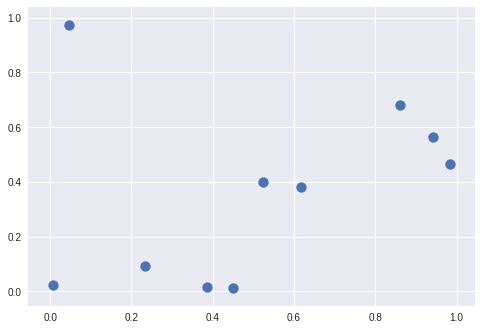

In [224]:
X = rand.rand(10,2)

print(X) 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0], X[:,1], s=100);

In [225]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)
dist_sq #shape : (10, 10)

array([[ 0.        ,  0.40999909,  0.90538547,  0.05550496,  0.50287983,
         1.14976739,  1.15936537,  0.19672877,  1.16632222,  0.14319923],
       [ 0.40999909,  0.        ,  0.55794316,  0.18090431,  0.00906581,
         0.21465798,  0.19098635,  0.15497331,  0.20095384,  0.16679585],
       [ 0.90538547,  0.55794316,  0.        ,  0.81458763,  0.67649219,
         1.13419594,  0.74752753,  1.08562368,  0.9704683 ,  1.03211241],
       [ 0.05550496,  0.18090431,  0.81458763,  0.        ,  0.23387834,
         0.70468321,  0.74108843,  0.05338715,  0.72671958,  0.0288717 ],
       [ 0.50287983,  0.00906581,  0.67649219,  0.23387834,  0.        ,
         0.14021843,  0.1470605 ,  0.16449241,  0.13755476,  0.18859392],
       [ 1.14976739,  0.21465798,  1.13419594,  0.70468321,  0.14021843,
         0.        ,  0.06080186,  0.48946337,  0.01100053,  0.56059965],
       [ 1.15936537,  0.19098635,  0.74752753,  0.74108843,  0.1470605 ,
         0.06080186,  0.        ,  0.61258786

In [226]:
# break down into steps
## Step 1
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [227]:
## Step 2
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [228]:
## Step 3
dist_sq = sq_differences.sum(-1)
dist_sq #shape : (10, 10)

array([[ 0.        ,  0.40999909,  0.90538547,  0.05550496,  0.50287983,
         1.14976739,  1.15936537,  0.19672877,  1.16632222,  0.14319923],
       [ 0.40999909,  0.        ,  0.55794316,  0.18090431,  0.00906581,
         0.21465798,  0.19098635,  0.15497331,  0.20095384,  0.16679585],
       [ 0.90538547,  0.55794316,  0.        ,  0.81458763,  0.67649219,
         1.13419594,  0.74752753,  1.08562368,  0.9704683 ,  1.03211241],
       [ 0.05550496,  0.18090431,  0.81458763,  0.        ,  0.23387834,
         0.70468321,  0.74108843,  0.05338715,  0.72671958,  0.0288717 ],
       [ 0.50287983,  0.00906581,  0.67649219,  0.23387834,  0.        ,
         0.14021843,  0.1470605 ,  0.16449241,  0.13755476,  0.18859392],
       [ 1.14976739,  0.21465798,  1.13419594,  0.70468321,  0.14021843,
         0.        ,  0.06080186,  0.48946337,  0.01100053,  0.56059965],
       [ 1.15936537,  0.19098635,  0.74752753,  0.74108843,  0.1470605 ,
         0.06080186,  0.        ,  0.61258786

In [229]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


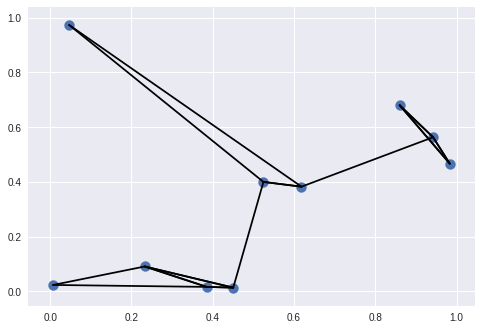

In [230]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)

plt.scatter(X[:, 0], X[:, 1], s= 100)
# draw lines from each point to its two nearest neighbors

for i in range(X.shape[0]) :
    for j in nearest_partition[i, :K+1] :
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color= 'black')